# Data Analysis in Geoscience Remote Sensing Projects: Exercises - 1
## Descriptive statistics 
Hendrik Andersen, contact: hendrik.andersen@kit.edu

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr

# activate inline plotting within jupyterlab
%matplotlib inline

In [3]:
a = np.random.randn(1000)

__Task 1__

Plot a histogram of the array a.

Compute the
1. average, median, standard deviation, minimum, maximum, the interquartile range and the 5th and 95th percentile
2. What is the difference between mean and median and when would you apply each?
3. Shapiro-Wilks test from scipy.stats to test for normality of the distribution
4. Confidence interval of the mean, and describe what this is useful for
--> tip: for the last point, do a quick search on the internet to find a solution that uses the function tconfint_mean(), maybe stackoverflow will help

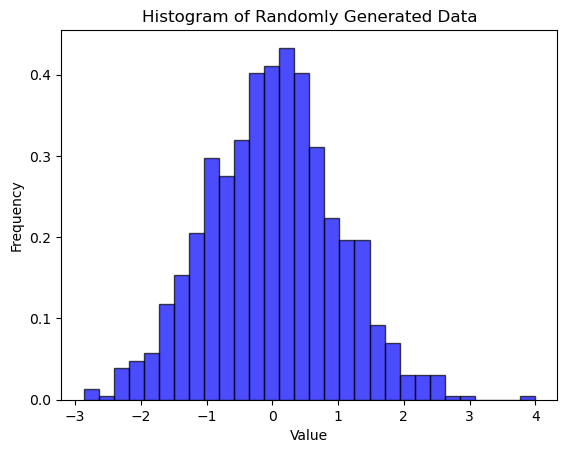

In [4]:
# Plot a histogram
plt.hist(a, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Randomly Generated Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the histogram
plt.show()

### Compute the average, median, standard deviation, minimum, maximum, the interquartile range and the 5th and 95th percentile

In [5]:
# Compute statistical measures
average = np.mean(a)
median = np.median(a)
std_dev = np.std(a)
minimum = np.min(a)
maximum = np.max(a)
q1, q3 = np.percentile(a, [25, 75])
iqr = q3 - q1
percentile_5th = np.percentile(a, 5)
percentile_95th = np.percentile(a, 95)

# Print the computed values
print(f'Average: {average:.4f}')
print(f'Median: {median:.4f}')
print(f'Standard Deviation: {std_dev:.4f}')
print(f'Minimum: {minimum:.4f}')
print(f'Maximum: {maximum:.4f}')
print(f'Interquartile Range (IQR): {iqr:.4f}')
print(f'5th Percentile: {percentile_5th:.4f}')
print(f'95th Percentile: {percentile_95th:.4f}')

Average: 0.0060
Median: 0.0049
Standard Deviation: 0.9791
Minimum: -2.8632
Maximum: 3.9919
Interquartile Range (IQR): 1.3044
5th Percentile: -1.6243
95th Percentile: 1.5872


---------------------------------
### What is the difference between mean and median and when would you apply each?

The mean and median are both measures of central tendency, but they capture different aspects of the data distribution.

Mean:
- The mean is also known as the average.
- It is calculated by summing up all the values in a dataset and dividing by the number of observations.
- The mean is sensitive to extreme values or outliers in the dataset.
- It is represented as: Mean = Sum of all values/ Number of observations

Median:
- The median is the middle value of a dataset when it is ordered.
- If there is an even number of observations, the median is the average of the two middle values.
- The median is less affected by extreme values or outliers compared to the mean.
- It is represented as: Median=Middle value of ordered dataset

When to use each:

Mean:
- Use the mean when the data is approximately normally distributed or symmetric.
- It is appropriate when the data does not have significant outliers.
- The mean is commonly used in calculations because it incorporates all data points.

Median:
- Use the median when the data is skewed or has outliers.
- It is a robust measure of central tendency that is less influenced by extreme values.
- The median is preferred when the distribution is not symmetric or when there are concerns about the impact of outliers on the central measure.

In summary, the choice between mean and median depends on the characteristics of your data. If your data is fairly symmetric and does not have extreme values, the mean may be a suitable measure of central tendency. If the data is skewed or contains outliers, the median may provide a more robust estimate of the central location. In some cases (skewed distributions, datasets with outliers, non-normal distributions, housing prices, income or salary data, education level, test scores), it's also useful to consider both measures to get a more complete understanding of the data distribution.

-------------------------

### Compute the Shapiro-Wilks test from scipy.stats to test for normality of the distribution
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

In [6]:
from scipy.stats import shapiro
import numpy as np

In [7]:
a = np.random.randn(1000)
# a

# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(a)

# Print the test statistic and p-value
print(f"Shapiro-Wilk Statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05  # significance level
if p_value > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

Shapiro-Wilk Statistic: 0.9984
P-value: 0.5049
Sample looks Gaussian (fail to reject H0)


Conclusion: The randomly drawn 1000 samples follows the normal distribution.

-----

## Confidence interval of the mean

In [8]:
import numpy as np
import scipy.stats

a = np.random.randn(1000)

def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

result = mean_confidence_interval(a)
print(result) #prints mean and the lower and upper bounds of the confidence interval.

(0.011006093044317216, -0.05069242279995303, 0.07270460888858746)


----

### Descriptive statistics in Pandas 
Pandas lets you conviniently apply functions relating to descriptive statistics on its dataframes.

In [9]:
# Read in data as pandas dataframe
df = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
df = df.rename(columns={"Fremont Bridge Sidewalks, south of N 34th St": "total", 
                        "Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk": "east",
                        "Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk": "west"}) 
df.mean() # Pandas computes the average for all columns in the dataframe 

C:\Users\sudur\AppData\Local\Temp\ipykernel_4032\3343713667.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)


total    106.024667
west      45.973973
east      60.050694
dtype: float64

<Axes: xlabel='Date'>

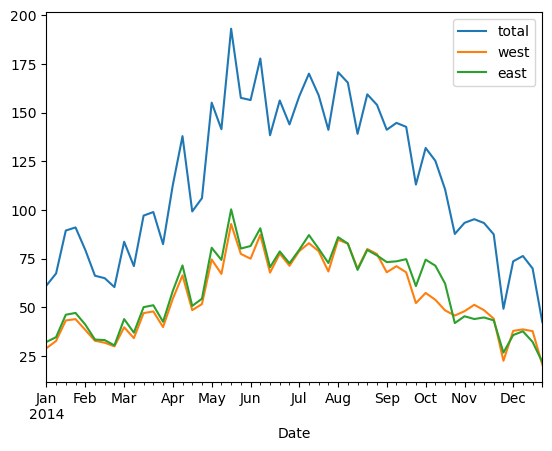

In [10]:
# Using resample, the resolution can be modified (here: temporal), check what resample('w').mean() means
df.resample('w').mean().loc['2014'].plot() 
#  resample('w').mean(), resamples the data in df on a weekly basis and then computes the mean for each week

<Axes: xlabel='Date'>

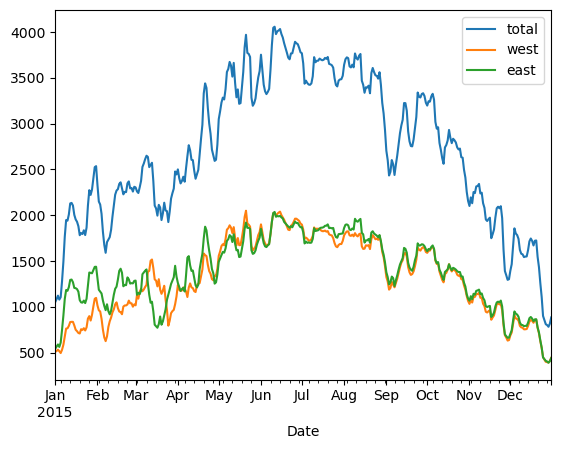

In [11]:
df.resample('d').sum().rolling(7).mean().loc['2015'].plot() # try to understand what exactly happens here
#df.resample('d') resamples the data in df on a daily basis
#sum(), after resampling it calculates the sum for each day
#rolling(7).mean(), computes a rolling mean with a window size of 7; for each data point, it calculates the mean of the surrounding 7 days  
#for the year 2015 and then plots

<Axes: xlabel='Date'>

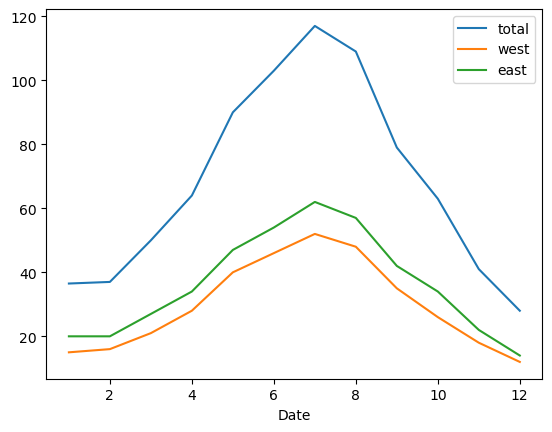

In [12]:
df.groupby(df.index.month).median().plot() # ... and here
#groupby the monthly data on the basis of the median and then plots

__Task 2__

5. Plot the average number of cyclists over the course of a week (monday, tuesday, ...). Tip: Use groupby
6. Plot a 12-month rolling average
7. How many cyclists (total) have passed the bridge in January 2015?

-----------------------

### Plot the average number of cyclists over the course of a week (monday, tuesday, ...). Tip: Use groupby

<Figure size 1000x600 with 0 Axes>

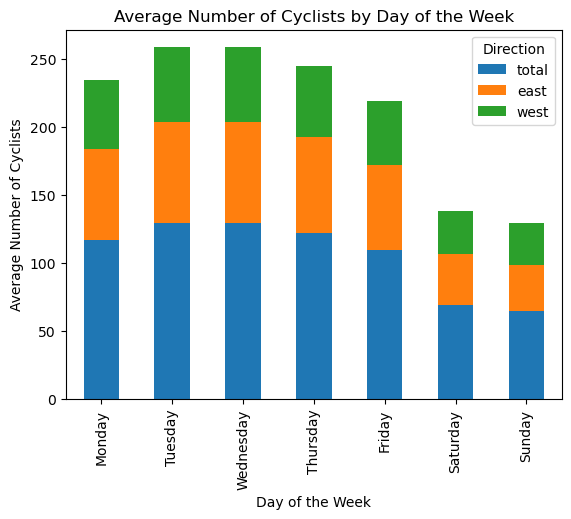

In [13]:
import matplotlib.pyplot as plt

# Assuming you have already loaded and prepared your DataFrame as in the previous code
# If not, make sure to run the previous code to load the data

# Group by day of the week and calculate the mean
daily_avg = df.groupby(df.index.day_name())[['total', 'east', 'west']].mean()

# Reorder the days of the week for better plotting
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_avg = daily_avg.reindex(days_order)

# Plotting
plt.figure(figsize=(10, 6))
daily_avg.plot(kind='bar', stacked=True)
plt.title('Average Number of Cyclists by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Cyclists')
plt.legend(title='Direction', loc='best', bbox_to_anchor=(1, 1))

plt.show()

--------------------------------
### Plot a 12-month rolling average

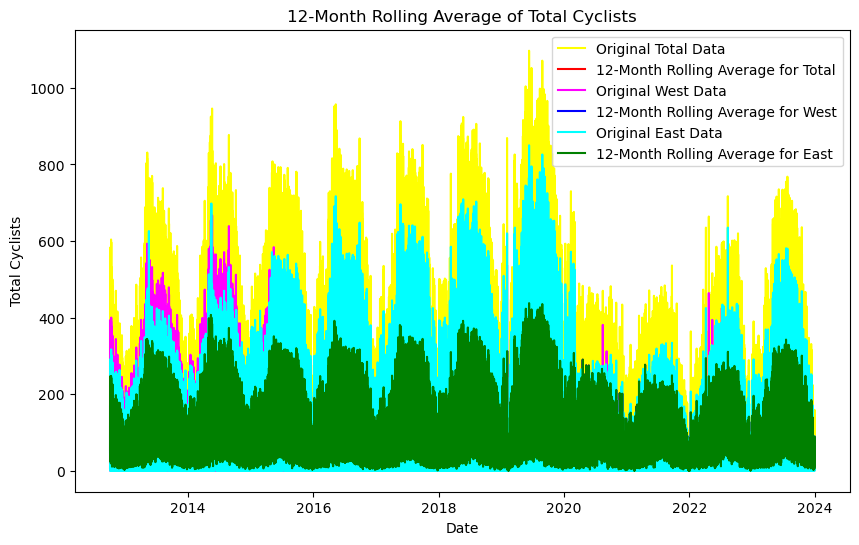

In [30]:
# Calculate the 12-month rolling average
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Calculate the 12-month rolling average
rolling_average_total = df['total'].rolling(window=12).mean()
rolling_average_west = df['total'].rolling(window=12).mean()
rolling_average_east = df['total'].rolling(window=12).mean()

# Plot the original data and the rolling average
plt.figure(figsize=(10, 6))
plt.plot(df['total'], label='Original Total Data', color='yellow')
plt.plot(rolling_average_total, label='12-Month Rolling Average for Total', color='red')

plt.plot(df['west'], label='Original West Data', color='magenta')
plt.plot(rolling_average_west, label='12-Month Rolling Average for West', color='blue')

plt.plot(df['east'], label='Original East Data', color='cyan')
plt.plot(rolling_average_east, label='12-Month Rolling Average for East', color='green')

# # Set ticks for every 12 months
# ax = plt.gca()
# ax.set_xticks(df.index[::3])  # Set ticks every 12 months
# ax.set_xticklabels(df.index[::3].strftime('%Y-%m'))  # Format the tick labels


# Add labels and title
plt.xlabel('Date')
plt.ylabel('Total Cyclists')
plt.title('12-Month Rolling Average of Total Cyclists')
plt.legend()

# Show the plot
plt.show()

# df.resample('M').sum().rolling(12).mean().plot()

-------------------
### How many cyclists (total) have passed the bridge in January 2015?

In [15]:
# Filter data for January 2015
january_2015_data = df['2015-01-01':'2015-01-31']

# Calculate the total number of cyclists for January 2015
total_cyclists_january_2015 = january_2015_data['total'].sum()

# Print the result
print(f'Total cyclists in January 2015: {total_cyclists_january_2015}')

Total cyclists in January 2015: 60630.0


------------

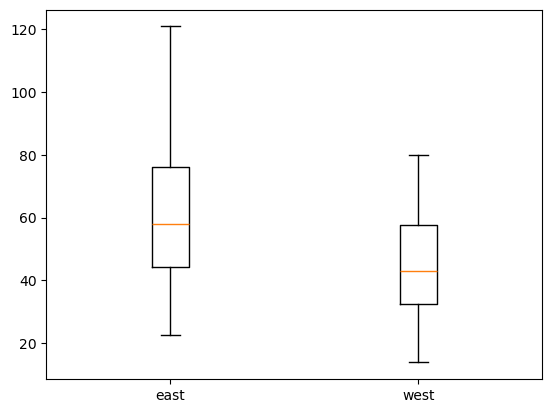

In [16]:
## Compare data groups and test differences for significance
# Visual comparison of two datasets using a boxplot
plt.boxplot([df['east'].resample('m').mean(),df['west'].resample('m').mean()],labels=['east','west'])
plt.show()

# The number of cyclists in western and eastern direction is different, but is the difference significant?.resample('m').mean()

__Task 3__ \
8. Check out the help of stats.ttest_ind: What exactly do the test results mean, and are the differences between X and y significant at the 0.05 level?

In [17]:
from scipy import stats
help(stats.ttest_ind)

Help on function ttest_ind in module scipy.stats._stats_py:

ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0, *, keepdims=False)
    Calculate the T-test for the means of *two independent* samples of scores.
    
    This is a test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int or None, default: 0
        If an int, the axis of the input along which to compute the statistic.
        The statistic of each axis-slice (e.g. row) of the input will appear in a
        corresponding element of the output.
        If ``None``, the input will be raveled before computing the statistic.
  

In [32]:
# yes, the two samples differ significantly (p<0.05) 
t,p=scipy.stats.ttest_ind(X,y)
p<0.05

NameError: name 'X' is not defined